# Installs

In [24]:
conda install pytorch torchvision torchaudio pytorch-cuda=12.4 -c pytorch -c nvidia

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
Channels:
 - pytorch
 - nvidia
 - conda-forge
 - defaults
Platform: linux-64
Solving environment: done

## Package Plan ##

  environment location: /home/dodeu/miniconda3/envs/PD1

  added / updated specs:
    - pytorch
    - pytorch-cuda=12.4
    - torchaudio
    - torchvision


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cuda-opencl-12.4.127       |                0          12 KB  nvidia
    libcufile-1.9.1.3          |                0         1.0 MB  nvidia
    libcurand-10.3.5.147       |                0        51.8 MB  nvidia
    libnvfatbin-12.4.127       |                0         856 KB  nvidia
    ------------------------------------------------------------
                                           Total:        53.6 MB

The following NEW packages will be INSTALLED:

  cuda-cudart        nvidia/lin

In [4]:
%conda install -c conda-forge -c pytorch u8darts-all

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
Channels:
 - conda-forge
 - pytorch
 - defaults
Platform: linux-64
Solving environment: done

## Package Plan ##

  environment location: /home/dodeu/miniconda3/envs/PD1

  added / updated specs:
    - u8darts-all


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            gpu_0          12 KB  conda-forge
    adagio-0.2.6               |     pyhd8ed1ab_1          21 KB  conda-forge
    appdirs-1.4.4              |     pyhd8ed1ab_1          14 KB  conda-forge
    aws-c-auth-0.8.0           |      hb921021_15         105 KB  conda-forge
    aws-c-cal-0.8.1            |       h1a47875_3          46 KB  conda-forge
    aws-c-common-0.10.6        |       hb9d3cd8_0         231 KB  conda-forge
    aws-c-compression-0.3.0    |       h4e1184b_5          19 KB  conda-forge
    aws-c-event-stre

In [27]:
%pip install timesfm[torch]

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
  Using cached timesfm-1.2.3-py3-none-any.whl.metadata (13 kB)
  Using cached einshape-1.0-py3-none-any.whl.metadata (706 bytes)
  Using cached huggingface_hub-0.27.0-py3-none-any.whl.metadata (13 kB)
  Using cached typer-0.15.1-py3-none-any.whl.metadata (15 kB)
  Using cached wandb-0.19.1-py3-none-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (10 kB)
  Using cached jax-0.4.38-py3-none-any.whl.metadata (22 kB)
  Using cached jaxlib-0.4.38-cp310-cp310-manylinux2014_x86_64.whl.metadata (1.0 kB)
  Using cached InquirerPy-0.3.4-py3-none-any.whl.metadata (8.1 kB)
  Using cached jax_cuda12_plugin-0.4.38-cp310-cp310-manylinux2014_x86_64.whl.metadata (1.2 kB)
  Using cached rich-13.9.4-py3-none-any.whl.metadata (18 kB)
  Using cached GitPython-3.1.43-py3-none-any.whl.metadata (13 kB)
  Using cached gitdb-4.0.11-py3-none-any.whl.metadata (1.2 kB)
  Using cached nvidia_cudnn_cu12-9.6.0.74-py3-none-manylinux_2_27_

# Imports

In [45]:
import pandas as pd
import os
from google.cloud import storage
from io import BytesIO
from darts import TimeSeries
import numpy as np
import timesfm
import matplotlib.pyplot as plt

TimesFM v1.2.0. See https://github.com/google-research/timesfm/blob/master/README.md for updated APIs.
Loaded Jax TimesFM.


/home/dodeu/miniconda3/envs/PD1/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loaded PyTorch TimesFM.


# Constants

In [3]:
main_dir = 'data/raw/Dane-Polcom/2022/AGH2022/'

# Loading files

In [42]:
def load_subdir_data(subdir_path, subdir_name):
    data_frames = []
    for file in os.listdir(subdir_path):
        file_path = os.path.join(subdir_path, file)
        df = pd.read_csv(file_path, sep=',')
        df.columns = [f"{subdir_name}_{col}" for col in df.columns]
        df['source_file'] = file
        data_frames.append(df)
        break
    return pd.concat(data_frames, ignore_index=True)

In [46]:
all_data = {}

subdirs = ['DM', 'PM', 'R02', 'R03', 'R04', 'S', 'V02', 'V03']
for subdir in subdirs:
    subdir_path = os.path.join(main_dir, subdir)
    all_data[subdir] = load_subdir_data(subdir_path, subdir)

In [44]:
all_data['DM']

,DM_Time,DM_Ballooned memory for DM,DM_Consumed for DM,DM_Host consumed % for DM,DM_Overhead consumed for DM,DM_Unnamed: 5,source_file
0,2021-04-14T00:00:00.000Z,0.0,151360528.0,12.0,53.0,0.0,DM_memory_1Y.csv
1,2021-04-15T00:00:00.000Z,0.0,151360080.0,12.0,53.0,0.0,DM_memory_1Y.csv
2,2021-04-16T00:00:00.000Z,0.0,151377568.0,12.0,53.0,0.0,DM_memory_1Y.csv
3,2021-04-17T00:00:00.000Z,0.0,151353184.0,12.0,53.0,0.0,DM_memory_1Y.csv
4,2021-04-18T00:00:00.000Z,0.0,151354240.0,12.0,53.0,0.0,DM_memory_1Y.csv
...,...,...,...,...,...,...,...
360,2022-04-09T00:00:00.000Z,0.0,8274262.0,0.0,68.0,0.0,DM_memory_1Y.csv
361,2022-04-10T00:00:00.000Z,0.0,8274230.0,0.0,68.0,0.0,DM_memory_1Y.csv
362,2022-04-11T00:00:00.000Z,0.0,8276348.0,0.0,68.0,0.0,DM_memory_1Y.csv
363,2022-04-12T00:00:00.000Z,0.0,8274438.0,0.0,68.0,0.0,DM_memory_1Y.csv


In [ ]:
combined_data = pd.concat(all_data.values(), keys=all_data.keys(), names=['subdir', 'row'])

In [47]:
def load_filtered_data(file_pattern):
    filtered_data_frames = []
    for subdir in subdirs:
        subdir_path = os.path.join(main_dir, subdir)
        target_file = f"{subdir}_{file_pattern}.csv"
        file_path = os.path.join(subdir_path, target_file)
        if os.path.exists(file_path):
            df = pd.read_csv(file_path)
            df.columns = [f"{subdir}_{col}" for col in df.columns]
            df['source_file'] = target_file
            filtered_data_frames.append(df)
    return pd.concat(filtered_data_frames, ignore_index=True)

# Create Dataset 1: CPU 1M files
dataset1 = load_filtered_data("cpu_1M")

# Create Dataset 2: Memory 1M files
dataset2 = load_filtered_data("memory_1M")

In [48]:
dataset1

,DM_Time,DM_Usage for DM,DM_Usage in MHz for DM,DM_Unnamed: 3,source_file,PM_Time,PM_Usage in MHz for PM,PM_Usage for PM,PM_Unnamed: 3,R02_Time,...,S_Usage for S,S_Unnamed: 3,V02_Time,V02_Usage in MHz for V02,V02_Usage for V02,V02_Unnamed: 3,V03_Time,V03_Usage in MHz for V03,V03_Usage for V03,V03_Unnamed: 3
0,2022-03-14T12:00:00.000Z,0.0,6.0,49.0,DM_cpu_1M.csv,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-03-14T14:00:00.000Z,0.0,7.0,49.0,DM_cpu_1M.csv,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-03-14T16:00:00.000Z,0.0,7.0,50.0,DM_cpu_1M.csv,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-03-14T18:00:00.000Z,0.0,7.0,49.0,DM_cpu_1M.csv,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-03-14T20:00:00.000Z,0.0,7.0,49.0,DM_cpu_1M.csv,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875,NaN,NaN,NaN,NaN,V03_cpu_1M.csv,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-04-13T00:00:00.000Z,5723.0,5.0,67.0
2876,NaN,NaN,NaN,NaN,V03_cpu_1M.csv,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-04-13T02:00:00.000Z,5719.0,5.0,67.0
2877,NaN,NaN,NaN,NaN,V03_cpu_1M.csv,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-04-13T04:00:00.000Z,11796.0,11.0,7.0
2878,NaN,NaN,NaN,NaN,V03_cpu_1M.csv,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-04-13T06:00:00.000Z,NaN,NaN,NaN


In [51]:
dataset1

ImportError: matplotlib is required for plotting when the default backend "matplotlib" is selected.

# Loading single example

In [100]:
polcom_DM_cpu_1M = pd.read_csv(os.path.join(main_dir, "PM/PM_cpu_1Y.csv"))
polcom_DM_cpu_1M

,Time,Usage in MHz for PM,Usage for PM,Unnamed: 3
0,2021-04-14T00:00:00.000Z,3977.0,2.0,95.0
1,2021-04-15T00:00:00.000Z,4040.0,3.0,NaN
2,2021-04-16T00:00:00.000Z,3987.0,2.0,96.0
3,2021-04-17T00:00:00.000Z,3679.0,2.0,73.0
4,2021-04-18T00:00:00.000Z,3662.0,2.0,72.0
...,...,...,...,...
360,2022-04-09T00:00:00.000Z,7197.0,5.0,35.0
361,2022-04-10T00:00:00.000Z,7140.0,5.0,31.0
362,2022-04-11T00:00:00.000Z,7716.0,5.0,74.0
363,2022-04-12T00:00:00.000Z,6346.0,4.0,72.0


In [101]:
polcom_DM_cpu_1M.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Time                 365 non-null    object 
 1   Usage in MHz for PM  363 non-null    float64
 2   Usage for PM         363 non-null    float64
 3   Unnamed: 3           357 non-null    float64
dtypes: float64(3), object(1)
memory usage: 11.5+ KB


<Axes: >

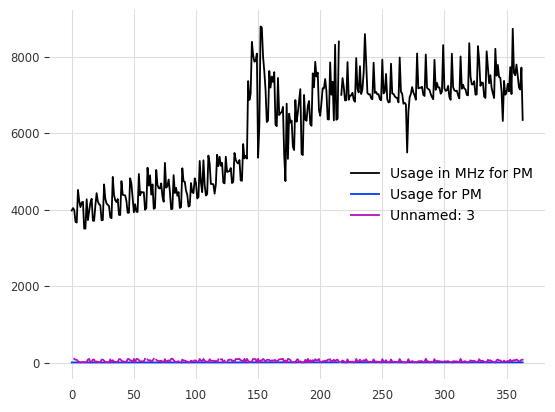

In [102]:
polcom_DM_cpu_1M.plot()

In [103]:
polcom_DM_cpu_1M['Time'] = pd.to_datetime(polcom_DM_cpu_1M['Time'])

In [104]:
polcom_DM_cpu_1M.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   Time                 365 non-null    datetime64[ns, UTC]
 1   Usage in MHz for PM  363 non-null    float64            
 2   Usage for PM         363 non-null    float64            
 3   Unnamed: 3           357 non-null    float64            
dtypes: datetime64[ns, UTC](1), float64(3)
memory usage: 11.5 KB


In [105]:
split_point = int(len(polcom_DM_cpu_1M) * 0.8)
train = polcom_DM_cpu_1M.iloc[:split_point]
test = polcom_DM_cpu_1M.iloc[split_point:]

<Axes: >

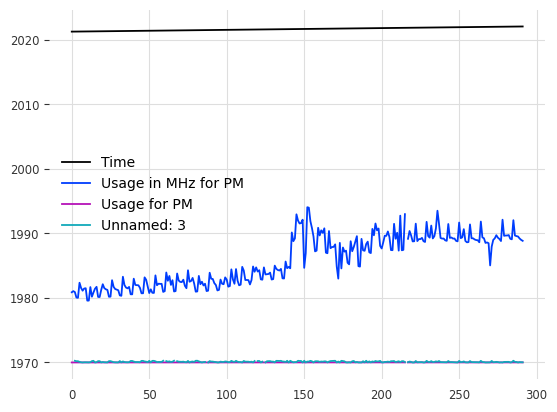

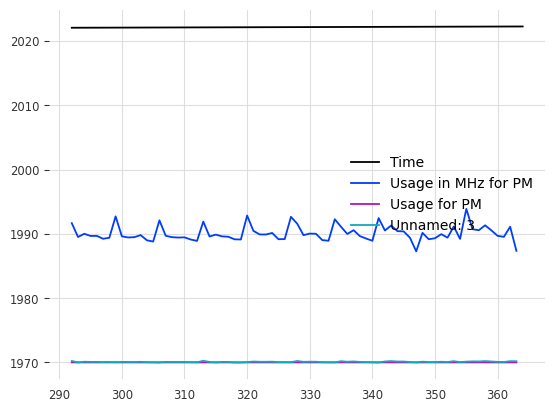

In [106]:
train.plot()
test.plot()

In [107]:
def plot_ts(df):
    # Plotting the data
    plt.figure(figsize=(12, 6))
    
    # Plotting 'Usage for DM' and 'Usage in MHz for DM'
    plt.plot(df['Time'], df['Usage for DM'], label='Usage for DM', alpha=0.7)
    plt.plot(df['Time'], df['Usage in MHz for DM'], label='Usage in MHz for DM', alpha=0.7)
    plt.plot(df['Time'], df['Unnamed: 3'], label='Unnamed: 3', alpha=0.7)
    
    # Adding labels and title
    plt.xlabel('Time')
    plt.ylabel('Usage')
    plt.title('Usage Trends Over Time')
    plt.legend()
    plt.grid(True)
    
    # Display the plot
    plt.show()


In [108]:
plot_ts(train)

KeyError: 'Usage for DM'

<Figure size 1200x600 with 0 Axes>

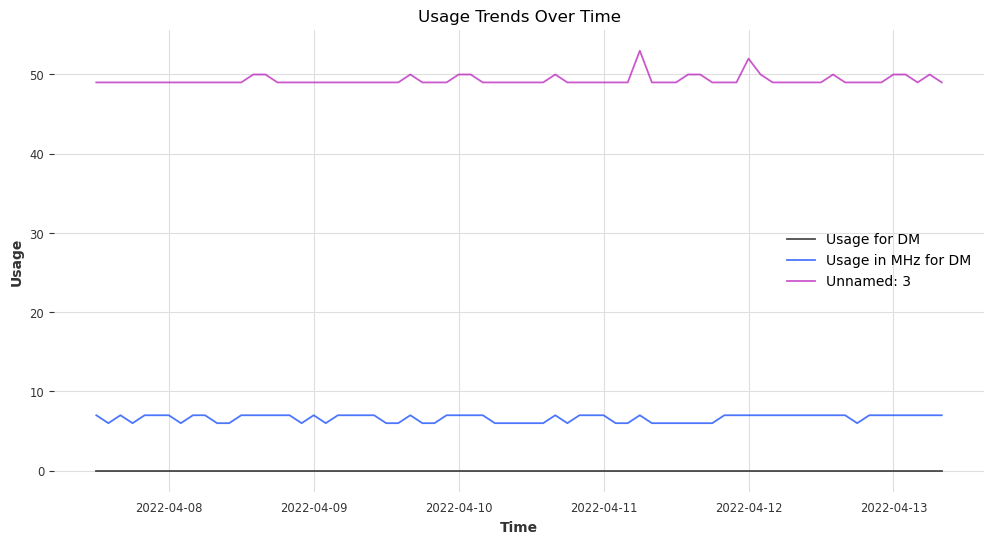

In [42]:
plot_ts(test)

# TimesFM

In [46]:
tfm = timesfm.TimesFm(
      hparams=timesfm.TimesFmHparams(
          backend="gpu",
          per_core_batch_size=32,
          horizon_len=128,
      ),
      checkpoint=timesfm.TimesFmCheckpoint(
          huggingface_repo_id="google/timesfm-1.0-200m-pytorch"),
  )

Fetching 3 files: 100%|██████████| 3/3 [01:47<00:00, 35.90s/it]


In [47]:
forecast_input = [
    np.sin(np.linspace(0, 20, 100)),
    np.sin(np.linspace(0, 20, 200)),
    np.sin(np.linspace(0, 20, 400)),
]
frequency_input = [0, 1, 2]

point_forecast, experimental_quantile_forecast = tfm.forecast(
    forecast_input,
    freq=frequency_input,
)

In [48]:
train

,Time,Usage for DM,Usage in MHz for DM,Unnamed: 3
0,2022-03-14 12:00:00+00:00,0.0,6.0,49.0
1,2022-03-14 14:00:00+00:00,0.0,7.0,49.0
2,2022-03-14 16:00:00+00:00,0.0,7.0,50.0
3,2022-03-14 18:00:00+00:00,0.0,7.0,49.0
4,2022-03-14 20:00:00+00:00,0.0,7.0,49.0
...,...,...,...,...
283,2022-04-07 02:00:00+00:00,0.0,7.0,49.0
284,2022-04-07 04:00:00+00:00,0.0,6.0,49.0
285,2022-04-07 06:00:00+00:00,0.0,7.0,49.0
286,2022-04-07 08:00:00+00:00,0.0,7.0,50.0


In [109]:
polcom_DM_cpu_1M = pd.read_csv(os.path.join(main_dir, "PM/PM_cpu_1Y.csv"))

In [110]:
polcom_DM_cpu_1M.rename(columns={'Time': 'ds'}, inplace=True)

In [111]:
polcom_DM_cpu_1M['ds'] = pd.to_datetime(polcom_DM_cpu_1M['ds'], errors='coerce')

In [112]:
polcom_DM_cpu_1M['unique_id'] = "T1"

In [113]:
split_point = int(len(polcom_DM_cpu_1M) * 0.8)
train = polcom_DM_cpu_1M.iloc[:split_point]
test = polcom_DM_cpu_1M.iloc[split_point:]

In [114]:
train

,ds,Usage in MHz for PM,Usage for PM,Unnamed: 3,unique_id
0,2021-04-14 00:00:00+00:00,3977.0,2.0,95.0,T1
1,2021-04-15 00:00:00+00:00,4040.0,3.0,NaN,T1
2,2021-04-16 00:00:00+00:00,3987.0,2.0,96.0,T1
3,2021-04-17 00:00:00+00:00,3679.0,2.0,73.0,T1
4,2021-04-18 00:00:00+00:00,3662.0,2.0,72.0,T1
...,...,...,...,...,...
287,2022-01-26 00:00:00+00:00,7155.0,5.0,32.0,T1
288,2022-01-27 00:00:00+00:00,7133.0,5.0,3.0,T1
289,2022-01-28 00:00:00+00:00,7021.0,5.0,22.0,T1
290,2022-01-29 00:00:00+00:00,6942.0,5.0,16.0,T1


In [115]:
forecast_df = tfm.forecast_on_df(
    inputs=train,
    freq="D",
    value_name="Unnamed: 3",
    num_jobs=-1,
)

Processing dataframe with multiple processes.
Finished preprocessing dataframe.
Finished forecasting.


In [98]:
forecast_df

,unique_id,ds,timesfm,timesfm-q-0.1,timesfm-q-0.2,timesfm-q-0.3,timesfm-q-0.4,timesfm-q-0.5,timesfm-q-0.6,timesfm-q-0.7,timesfm-q-0.8,timesfm-q-0.9
0,T1,2022-04-08 12:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,T1,2022-04-09 12:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,T1,2022-04-10 12:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,T1,2022-04-11 12:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,T1,2022-04-12 12:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
123,T1,2022-08-09 12:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,T1,2022-08-10 12:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,T1,2022-08-11 12:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,T1,2022-08-12 12:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


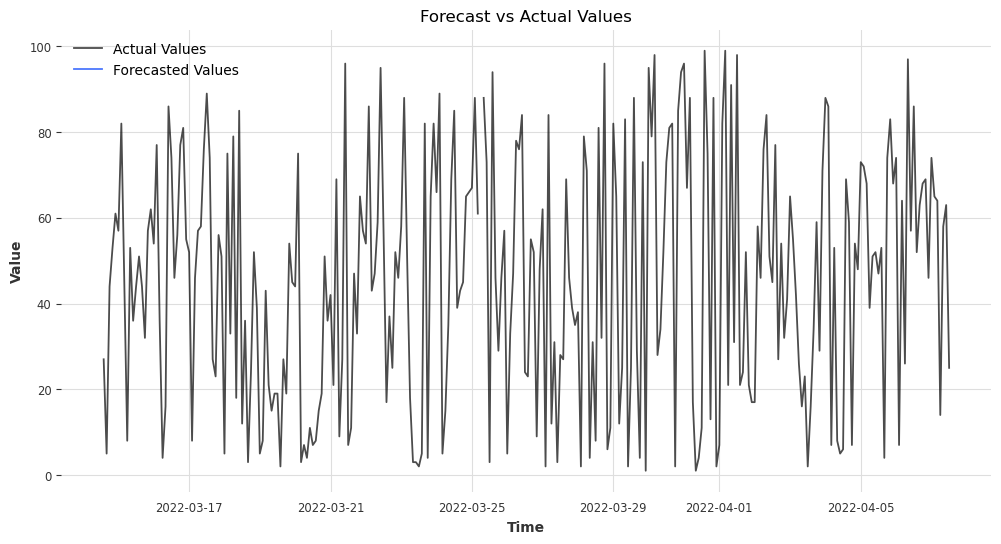

In [99]:
# Plot the original data
plt.figure(figsize=(12, 6))
plt.plot(train['ds'], train['Unnamed: 3'], label='Actual Values', alpha=0.7)

# Plot the forecasted data
plt.plot(forecast_df['ds'], forecast_df['timesfm'], label='Forecasted Values', alpha=0.7)

# Add labels, title, and legend
plt.title('Forecast vs Actual Values')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [71]:
print(forecast_df.columns)

Index(['unique_id', 'ds', 'timesfm', 'timesfm-q-0.1', 'timesfm-q-0.2',
       'timesfm-q-0.3', 'timesfm-q-0.4', 'timesfm-q-0.5', 'timesfm-q-0.6',
       'timesfm-q-0.7', 'timesfm-q-0.8', 'timesfm-q-0.9'],
      dtype='object')


# Google Cluster Dataset

In [4]:
def list_blobs(bucket_name):
    storage_client = storage.Client()

    # Note: Client.list_blobs requires at least package version 1.17.0.
    blobs = storage_client.list_blobs(bucket_name)

    # Note: The call returns a response only when the iterator is consumed.
    for blob in blobs:
        print(blob.name)

In [10]:
bucket_name = "clusterdata-2011-2"

In [12]:
def blob_metadata(bucket_name, blob_name):
    """Prints out a blob's metadata."""
    # bucket_name = 'your-bucket-name'
    # blob_name = 'your-object-name'

    storage_client = storage.Client()
    bucket = storage_client.bucket(bucket_name)

    # Retrieve a blob, and its metadata, from Google Cloud Storage.
    # Note that `get_blob` differs from `Bucket.blob`, which does not
    # make an HTTP request.
    blob = bucket.get_blob(blob_name)

    print(f"Blob: {blob.name}")
    print(f"Bucket: {blob.bucket.name}")
    print(f"Storage class: {blob.storage_class}")
    print(f"ID: {blob.id}")
    print(f"Size: {blob.size} bytes")
    print(f"Updated: {blob.updated}")
    print(f"Generation: {blob.generation}")
    print(f"Metageneration: {blob.metageneration}")
    print(f"Etag: {blob.etag}")
    print(f"Owner: {blob.owner}")
    print(f"Component count: {blob.component_count}")
    print(f"Crc32c: {blob.crc32c}")
    print(f"md5_hash: {blob.md5_hash}")
    print(f"Cache-control: {blob.cache_control}")
    print(f"Content-type: {blob.content_type}")
    print(f"Content-disposition: {blob.content_disposition}")
    print(f"Content-encoding: {blob.content_encoding}")
    print(f"Content-language: {blob.content_language}")
    print(f"Metadata: {blob.metadata}")
    print(f"Medialink: {blob.media_link}")
    print(f"Custom Time: {blob.custom_time}")
    print("Temporary hold: ", "enabled" if blob.temporary_hold else "disabled")
    print(
        "Event based hold: ",
        "enabled" if blob.event_based_hold else "disabled",
    )
    print(f"Retention mode: {blob.retention.mode}")
    print(f"Retention retain until time: {blob.retention.retain_until_time}")
    if blob.retention_expiration_time:
        print(
            f"retentionExpirationTime: {blob.retention_expiration_time}"
        )

In [14]:
list_blobs(bucket_name)

MD5SUM
README
SHA1SUM
SHA256SUM
job_events/part-00000-of-00500.csv.gz
job_events/part-00001-of-00500.csv.gz
job_events/part-00002-of-00500.csv.gz
job_events/part-00003-of-00500.csv.gz
job_events/part-00004-of-00500.csv.gz
job_events/part-00005-of-00500.csv.gz
job_events/part-00006-of-00500.csv.gz
job_events/part-00007-of-00500.csv.gz
job_events/part-00008-of-00500.csv.gz
job_events/part-00009-of-00500.csv.gz
job_events/part-00010-of-00500.csv.gz
job_events/part-00011-of-00500.csv.gz
job_events/part-00012-of-00500.csv.gz
job_events/part-00013-of-00500.csv.gz
job_events/part-00014-of-00500.csv.gz
job_events/part-00015-of-00500.csv.gz
job_events/part-00016-of-00500.csv.gz
job_events/part-00017-of-00500.csv.gz
job_events/part-00018-of-00500.csv.gz
job_events/part-00019-of-00500.csv.gz
job_events/part-00020-of-00500.csv.gz
job_events/part-00021-of-00500.csv.gz
job_events/part-00022-of-00500.csv.gz
job_events/part-00023-of-00500.csv.gz
job_events/part-00024-of-00500.csv.gz
job_events/part-00

In [17]:
blob_metadata(bucket_name, "task_usage/part-00024-of-00500.csv.gz")

Blob: task_usage/part-00024-of-00500.csv.gz
Bucket: clusterdata-2011-2
Storage class: STANDARD
ID: clusterdata-2011-2/task_usage/part-00024-of-00500.csv.gz/1416267240061000
Size: 93831349 bytes
Updated: 2014-11-19 17:02:58.650000+00:00
Generation: 1416267240061000
Metageneration: 4
Etag: CMjwgM7mgsICEAQ=
Owner: None
Component count: None
Crc32c: uzzq2Q==
md5_hash: Vejphx6iX2EHYrqS4/riow==
Cache-control: None
Content-type: text/csv
Content-disposition: None
Content-encoding: None
Content-language: None
Metadata: None
Medialink: https://storage.googleapis.com/download/storage/v1/b/clusterdata-2011-2/o/task_usage%2Fpart-00024-of-00500.csv.gz?generation=1416267240061000&alt=media
Custom Time: None
Temporary hold:  disabled
Event based hold:  disabled
Retention mode: None
Retention retain until time: None


In [28]:


def merge_files_to_dataframe(bucket_name, prefix):
    storage_client = storage.Client()
    bucket = storage_client.bucket(bucket_name)
    blobs = storage_client.list_blobs(bucket_name, prefix=prefix)

    dataframes = []
    for blob in blobs:
        print(f"Downloading {blob.name}...")
        data = blob.download_as_bytes()
        df = pd.read_csv(BytesIO(data), compression='gzip', header=None)
        dataframes.append(df)

    # Concatenate all DataFrames
    final_df = pd.concat(dataframes, ignore_index=True)
    return final_df

bucket_name = "clusterdata-2011-2"
prefix = "task_usage/part-0000"
df = merge_files_to_dataframe(bucket_name, prefix)



In [29]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,600000000,900000000,3418309,0,4155527081,0.001562,0.067870,0.075680,0.001156,0.001503,0.067870,0.000003,0.000187,0.039670,0.000357,2.445,0.007243,0,1,0.000000
1,600000000,900000000,3418309,1,329150663,0.001568,0.067870,0.075560,0.000320,0.000700,0.067870,0.000006,0.000188,0.033020,0.000929,2.100,0.005791,0,1,0.000000
2,600000000,900000000,3418314,0,3938719206,0.000307,0.080440,0.095210,0.000282,0.000670,0.080440,0.000005,0.000184,0.023770,0.000786,5.588,0.020800,0,1,0.000000
3,600000000,900000000,3418314,1,351618647,0.000300,0.080440,0.095210,0.000537,0.000870,0.080440,0.000010,0.000183,0.007919,0.002285,5.198,0.020380,0,1,0.000000
4,600000000,900000000,3418319,0,431052910,0.000461,0.077150,0.087400,0.000625,0.000852,0.077150,0.000002,0.000204,0.005112,0.000215,2.937,0.009449,0,1,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25152360,50711000000,51000000000,6254869357,9146,4802887274,0.054630,0.018130,0.019560,0.000364,0.000419,0.031220,0.003437,0.000005,0.223400,0.029570,1.335,NaN,0,0,0.070800
25152361,50711000000,50771000000,6254921876,116,38657749,0.001621,0.000992,0.001738,0.000058,0.000463,0.001072,0.001051,0.000000,0.018830,0.035340,1.746,0.002948,0,0,0.000406
25152362,50711000000,50770000000,6254921876,193,294823364,0.001497,0.001339,0.001753,0.000393,0.000809,0.001419,0.003681,0.000000,0.023620,0.065920,2.319,0.006822,0,0,0.000606
25152363,50711000000,50743000000,6254925661,1,4196289406,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0,0,0.000000


In [116]:
import torch
torch.cuda.is_available()

False

In [ ]:
import requests

# Define the URL to the raw dataset file from GitHub
url = 'https://raw.githubusercontent.com/Azure/AzurePublicDataset/master/path_to_your_dataset.csv'

# Download the dataset
response = requests.get(url)
if response.status_code == 200:
    with open('azure_vm_cpu_utilization.csv', 'wb') as file:
        file.write(response.content)
    print("Dataset downloaded successfully.")
else:
    print("Failed to download dataset. Status code:", response.status_code)

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

class LSTMModel(nn.Module):
    def __init__(self, input_size=1, hidden_size=50, num_layers=2, output_size=1):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])  # Take the last time step output
        return out

# Function to create sequences
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i + seq_length]
        y = data[i + seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# Create training sequences
SEQ_LENGTH = 24
train_sequences, train_labels = create_sequences(train_data['cpu_utilization'].values, SEQ_LENGTH)
train_sequences = torch.tensor(train_sequences, dtype=torch.float32).unsqueeze(-1)
train_labels = torch.tensor(train_labels, dtype=torch.float32).unsqueeze(-1)

# Create DataLoader for training
train_dataset = TensorDataset(train_sequences, train_labels)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Initialize and train the model
model = LSTMModel()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
EPOCHS = 20
for epoch in range(EPOCHS):
    for batch in train_loader:
        seqs, labels = batch
        optimizer.zero_grad()
        output = model(seqs)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}, Loss: {loss.item()}")


In [2]:
!jupyter nbconvert --to script extract.ipynb

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
[NbConvertApp] Converting notebook extract.ipynb to script
[NbConvertApp] Writing 12570 bytes to extract.py


In [7]:
#!/usr/bin/env python
"""
Example implementation of a CNN-LSTM with hybrid PSO–GA hyperparameter optimization.
Note: This is a demonstration; training a deep network many times is expensive so we use
a low epoch count and a small (or sampled) dataset.
"""

import random
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset

# For PSO:
import pyswarms as ps

# For GA:
from deap import base, creator, tools, algorithms

#########################################
# 1. Prepare a PyTorch Dataset
#########################################

class TimeSeriesDataset(Dataset):
    """
    A simple Dataset for univariate time series forecasting.
    Given a 1D numpy array or pandas Series, it creates (input, target) pairs by sliding a window.
    """
    def __init__(self, series, sequence_length: int):
        """
        Args:
            series (array-like): The time series data (1D).
            sequence_length (int): The number of time steps used for each input sample.
        """
        self.series = np.array(series)
        self.sequence_length = sequence_length

    def __len__(self):
        return len(self.series) - self.sequence_length

    def __getitem__(self, idx):
        # x has shape (sequence_length,) and y is the next value in the series.
        x = self.series[idx: idx + self.sequence_length]
        y = self.series[idx + self.sequence_length]
        # We reshape x to have a feature dimension (here, 1)
        return torch.tensor(x, dtype=torch.float32).unsqueeze(-1), torch.tensor(y, dtype=torch.float32)

#########################################
# 2. Define the CNN-LSTM Model
#########################################

class CNNLSTM(nn.Module):
    def __init__(self, input_channels: int, num_filters: int, kernel_size: int,
                 lstm_hidden_size: int, lstm_num_layers: int, dropout: float):
        """
        Args:
            input_channels (int): Number of input features (for univariate, use 1).
            num_filters (int): Number of filters in the convolutional layer.
            kernel_size (int): Kernel size for the convolution.
            lstm_hidden_size (int): Hidden size for the LSTM.
            lstm_num_layers (int): Number of LSTM layers.
            dropout (float): Dropout probability.
        """
        super(CNNLSTM, self).__init__()
        # The convolutional layer: input shape (batch, input_channels, seq_length)
        self.conv1 = nn.Conv1d(in_channels=input_channels,
                               out_channels=num_filters,
                               kernel_size=kernel_size)
        # The LSTM: note that the convolution will change the sequence length
        self.lstm = nn.LSTM(input_size=num_filters,
                            hidden_size=lstm_hidden_size,
                            num_layers=lstm_num_layers,
                            batch_first=True)
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(lstm_hidden_size, 1)  # regression output

    def forward(self, x):
        # x shape: (batch, seq_length, input_channels)
        x = x.permute(0, 2, 1)  # → (batch, input_channels, seq_length)
        x = self.conv1(x)       # → (batch, num_filters, L_out)
        x = x.permute(0, 2, 1)  # → (batch, L_out, num_filters)
        lstm_out, _ = self.lstm(x)  # → (batch, L_out, lstm_hidden_size)
        # Use the last LSTM output for prediction:
        lstm_last = lstm_out[:, -1, :]  # (batch, lstm_hidden_size)
        x = self.dropout(lstm_last)
        x = self.fc(x)  # (batch, 1)
        return x

#########################################
# 3. Training and Evaluation Function
#########################################

def train_evaluate_model(params, train_loader, val_loader, device, num_epochs=5):
    """
    Given a hyperparameter vector, build the CNN-LSTM, train it, and return the validation loss.
    
    params: A list or array of 5 numbers:
      [learning_rate, num_filters, kernel_size, lstm_hidden_size, dropout]
      (Integer hyperparameters are rounded.)
    """
    # Unpack hyperparameters (and round the ones that must be integers)
    learning_rate = params[0]
    num_filters = int(round(params[1]))
    kernel_size = int(round(params[2]))
    lstm_hidden_size = int(round(params[3]))
    dropout = params[4]

    # For this demo, we fix number of LSTM layers to 1.
    model = CNNLSTM(input_channels=1,
                    num_filters=num_filters,
                    kernel_size=kernel_size,
                    lstm_hidden_size=lstm_hidden_size,
                    lstm_num_layers=1,
                    dropout=dropout).to(device)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    criterion = nn.MSELoss()

    # Training loop
    model.train()
    for epoch in range(num_epochs):
        for x_batch, y_batch in train_loader:
            x_batch, y_batch = x_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            outputs = model(x_batch)
            loss = criterion(outputs, y_batch.unsqueeze(-1))
            loss.backward()
            optimizer.step()

    # Evaluation on the validation set
    model.eval()
    total_loss = 0.0
    with torch.no_grad():
        for x_batch, y_batch in val_loader:
            x_batch, y_batch = x_batch.to(device), y_batch.to(device)
            outputs = model(x_batch)
            loss = criterion(outputs, y_batch.unsqueeze(-1))
            total_loss += loss.item() * x_batch.size(0)
    avg_loss = total_loss / len(val_loader.dataset)
    return avg_loss

#########################################
# 4. Set Up Data and Dataloaders
#########################################

# For demonstration, assume you have a processed DataFrame (e.g., df_combined_M)
# Here we simply simulate a univariate time series.
np.random.seed(42)
data_length = 500
series = pd.Series(np.sin(np.linspace(0, 20, data_length)) + np.random.normal(0, 0.2, data_length))

sequence_length = 20  # window length
dataset = TimeSeriesDataset(series, sequence_length)

# Split into training and validation sets (e.g., 80/20 split)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

batch_size = 16
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=batch_size)

# Set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#########################################
# 5. Hyperparameter Optimization with PSO
#########################################

# Define our hyperparameter search space:
# We will optimize the following 5 parameters:
#   [learning_rate, num_filters, kernel_size, lstm_hidden_size, dropout]
lb = [1e-4, 16, 2, 16, 0.0]
ub = [1e-2, 128, 5, 128, 0.5]
bounds = (np.array(lb), np.array(ub))

# PSO options (you can experiment with these)
pso_options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}

def pso_fitness_function(hyperparams_candidates):
    """
    hyperparams_candidates: an array of shape (n_particles, dimensions)
    Returns a 1D array of validation losses.
    """
    losses = []
    # For each candidate, evaluate the model
    for params in hyperparams_candidates:
        loss = train_evaluate_model(params, train_loader, val_loader, device, num_epochs=5)
        losses.append(loss)
    return np.array(losses)

# Initialize and run PSO
pso_optimizer = ps.single.GlobalBestPSO(n_particles=10,
                                         dimensions=5,
                                         options=pso_options,
                                         bounds=bounds)
print("Starting PSO optimization...")
best_cost, best_pos = pso_optimizer.optimize(pso_fitness_function, iters=10)
print("PSO best cost (loss):", best_cost)
print("PSO best hyperparameters:", best_pos)

#########################################
# 6. Refine Hyperparameters with a Genetic Algorithm (GA)
#########################################

# In DEAP, we define a minimization problem.
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
# Attribute generators: for continuous values we use random.uniform; for integer values we use randint.
toolbox.register("attr_lr", random.uniform, lb[0], ub[0])
toolbox.register("attr_filters", lambda: random.randint(lb[1], ub[1]))
toolbox.register("attr_kernel", lambda: random.randint(lb[2], ub[2]))
toolbox.register("attr_lstm_hidden", lambda: random.randint(lb[3], ub[3]))
toolbox.register("attr_dropout", random.uniform, lb[4], ub[4])

# An individual is a list of 5 attributes.
toolbox.register("individual", tools.initCycle, creator.Individual,
                 (toolbox.attr_lr, toolbox.attr_filters, toolbox.attr_kernel,
                  toolbox.attr_lstm_hidden, toolbox.attr_dropout), n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def ga_eval(individual):
    """Evaluation function for GA; returns a tuple (loss,)"""
    loss = train_evaluate_model(individual, train_loader, val_loader, device, num_epochs=5)
    return (loss,)

toolbox.register("evaluate", ga_eval)
toolbox.register("mate", tools.cxBlend, alpha=0.5)  # blend crossover for real-valued genes
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

# Initialize GA population; here we create 20 individuals.
population = toolbox.population(n=20)

# Optionally, you can inject the best PSO candidate into the population:
best_individual_from_pso = creator.Individual(list(best_pos))
population[0] = best_individual_from_pso

NGEN = 10  # number of GA generations
print("\nStarting GA optimization...")
for gen in range(NGEN):
    offspring = algorithms.varAnd(population, toolbox, cxpb=0.5, mutpb=0.2)
    fits = list(map(toolbox.evaluate, offspring))
    for fit, ind in zip(fits, offspring):
        ind.fitness.values = fit
    population = toolbox.select(offspring, k=len(population))
    best = tools.selBest(population, k=1)[0]
    print(f"Generation {gen + 1} best loss: {best.fitness.values[0]:.4f}")

best_individual = tools.selBest(population, k=1)[0]
print("\nBest hyperparameters found by GA:", best_individual)

#########################################
# 7. (Optional) Train the Final Model with the Optimized Hyperparameters
#########################################

final_params = list(best_individual)
print("\nTraining final model with hyperparameters:", final_params)
final_model = CNNLSTM(input_channels=1,
                      num_filters=int(round(final_params[1])),
                      kernel_size=int(round(final_params[2])),
                      lstm_hidden_size=int(round(final_params[3])),
                      lstm_num_layers=1,
                      dropout=final_params[4]).to(device)
final_optimizer = optim.Adam(final_model.parameters(), lr=final_params[0])
criterion = nn.MSELoss()

# Train for more epochs (e.g., 50) on the full training set
num_final_epochs = 50
final_model.train()
for epoch in range(num_final_epochs):
    epoch_loss = 0.0
    for x_batch, y_batch in train_loader:
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)
        final_optimizer.zero_grad()
        outputs = final_model(x_batch)
        loss = criterion(outputs, y_batch.unsqueeze(-1))
        loss.backward()
        final_optimizer.step()
        epoch_loss += loss.item() * x_batch.size(0)
    print(f"Epoch {epoch+1}/{num_final_epochs}, Loss: {epoch_loss / len(train_loader.dataset):.4f}")

# (Evaluate on your test set, save the model, etc.)



2025-02-07 04:42:58,707 - pyswarms.single.global_best - INFO - Optimize for 10 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Starting PSO optimization...


pyswarms.single.global_best: 100%|██████████|10/10, best_cost=0.0526
2025-02-07 04:55:16,728 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.052648792043328285, best pos: [1.68915531e-03 4.11499700e+01 4.10601716e+00 1.17594690e+02
 3.06015842e-01]


PSO best cost (loss): 0.052648792043328285
PSO best hyperparameters: [1.68915531e-03 4.11499700e+01 4.10601716e+00 1.17594690e+02
 3.06015842e-01]

Starting GA optimization...


ValueError: dropout probability has to be between 0 and 1, but got -0.043925316531532255

In [6]:
%pip install deap

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
Note: you may need to restart the kernel to use updated packages.
